Classifying Tiny ImageNet [computer vision in SNU]
============

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import caffe
from tiny_util import get_synset_words

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

caffe_root = '../'
DATA_PATH = '../data/flickr_style/images'
MODEL_FILE_STYLE = '../models/finetune_flickr_style/deploy.prototxt'
PRETRAINED_STYLE = '../models/finetune_flickr_style/finetune_flickr_style.caffemodel'
MODEL_FILE_IMGNET = '../models/bvlc_reference_caffenet/deploy.prototxt'
PRETRAINED_IMGNET = '../models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'

style_dic = np.loadtxt(caffe_root + 'examples/finetune_flickr_style/style_names.txt', str, delimiter='\t')
synset_dic = np.loadtxt(caffe_root + 'data/ilsvrc12/synset_words.txt', str, delimiter='\t')
flickr_test_set = np.loadtxt(caffe_root + 'data/flickr_style/test.txt' , str, delimiter='\t')
flickr_test_set_path = [readline.split()[0] for readline in flickr_test_set]
flickr_test_set_label = [int(readline.split()[1]) for readline in flickr_test_set]
flickr_train_set = np.loadtxt(caffe_root + 'data/flickr_style/train.txt' , str, delimiter='\t')
flickr_train_set_path = [readline.split()[0] for readline in flickr_test_set]
flickr_train_set_label = [int(readline.split()[1]) for readline in flickr_test_set]

caffe.set_mode_gpu()

In [2]:
# caffe.set_mode_cpu()
caffe.set_mode_gpu()

net_style = caffe.Classifier(MODEL_FILE_STYLE, PRETRAINED_STYLE,
                       mean=np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(227, 227))

net_obj = caffe.Classifier(MODEL_FILE_IMGNET, PRETRAINED_IMGNET,
                       mean=np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

In [3]:
# take an array of shape (n, height, width) or (n, height, width, channels)
# and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

In [4]:
# [(k, v.data.shape) for k, v in net.blobs.items()]

In [5]:
# [(k, v[0].data.shape) for k, v in net.params.items()]

In [23]:
"""
TEST net's blob data batch size
"""
net_style = caffe.Classifier(MODEL_FILE_STYLE, PRETRAINED_STYLE,
                       mean=np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(227, 227))
img1 = caffe.io.load_image(flickr_test_set_path[9])
img2 = caffe.io.load_image(flickr_test_set_path[10])
img3 = caffe.io.load_image(flickr_test_set_path[11])
predict_style = net_style.predict([img1], oversample=True)
print net_style.blobs['fc7'].data.shape
print np.mean(net_style.blobs['fc7'].data, axis=1)
print np.mean(net_style.blobs['fc7'].data, axis=0)
predict_style = net_style.predict([img2], oversample=False)
print net_style.blobs['fc7'].data.shape
print np.mean(net_style.blobs['fc7'].data, axis=1)
predict_style = net_style.predict([img3], oversample=False)
print net_style.blobs['fc7'].data.shape
print np.mean(net_style.blobs['fc7'].data, axis=1)

predict_style = net_style.predict([img1, img2, img3,img1, img2, img3,img1, img2, img3,img1], oversample=False)
print np.mean(net_style.blobs['fc7'].data, axis=1)

(10, 4096)
[ 0.03722636  0.03722636  0.03722636  0.03722636  0.03722636  0.03794215
  0.03794215  0.03794215  0.03794215  0.03794215]
[ 0.  0.  0. ...,  0.  0.  0.]
(10, 4096)
[ 0.04376183  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
(10, 4096)
[ 0.07209872  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
[ 0.03722636  0.04376183  0.07209872  0.03722636  0.04376183  0.07209872
  0.03722636  0.04376183  0.07209872  0.03722636]


'\n\n'

true label:  Long Exposure
Top0: Long Exposure - 0.945665955544
Top1: Sunny - 0.0232003331184
Top2: HDR - 0.015375206247
Top3: Bright - 0.00524555426091
Top4: Romantic - 0.00496722944081
Top(syns)0: n02980441 castle - 0.522677183151
Top(syns)1: n03933933 pier - 0.0912797600031
Top(syns)2: n04366367 suspension bridge - 0.0747898519039
Top(syns)3: n03216828 dock, dockage, docking facility - 0.0615222975612
Top(syns)4: n03877845 palace - 0.0561419352889


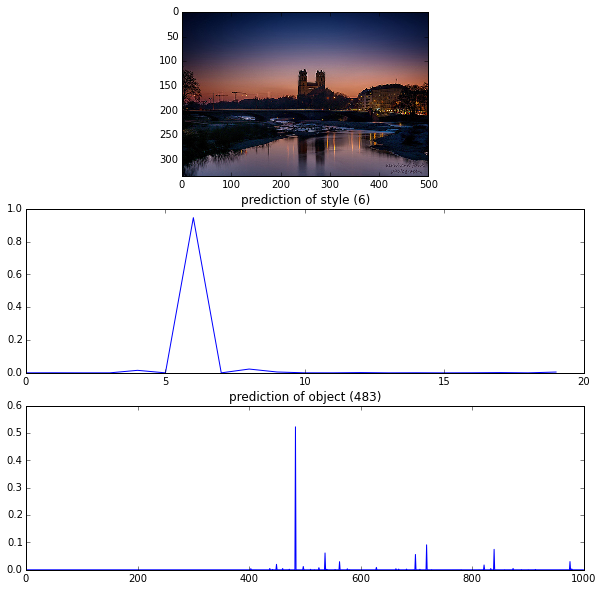

In [6]:
"""
test (novel images) from only style net
"""

n = 9

img = caffe.io.load_image(flickr_test_set_path[n])
predict_style = net_style.predict([img], oversample=True)
predict_obj = net_obj.predict([img], oversample=True)

print "true label: ", style_dic[flickr_test_set_label[n]]

for i, label in enumerate(predict_style[0].argsort()[-1:-6:-1]):
    print "Top{0}: {1} - {2}".format(i, style_dic[label], predict_style[0][label])

for i, label in enumerate(predict_obj[0].argsort()[-1:-6:-1]):
    print "Top(syns){0}: {1} - {2}".format(i, synset_dic[label], predict_obj[0][label])

plt.figure()
plt.subplot(3,1,1)
plt.imshow(img)
plt.subplot(3,1,2)
plt.plot(predict_style[0])
plt.title("prediction of style ({})".format(predict_style[0].argmax()))
plt.subplot(3,1,3)
plt.plot(predict_obj[0])
plt.title("prediction of object ({})".format(predict_obj[0].argmax()))

In [24]:
len(flickr_test_set_path)

15986

15986

In [14]:
# Get Test Imgs
def get_accuracy_top5(net, flickr_test_set_path, flickr_test_set_label, batch=100):
    nbatch = len(flickr_test_set_path)/batch

    accuracy5 = np.zeros((1,nbatch*batch))
    accuracy1 = np.zeros((1,nbatch*batch))

    for n in range(nbatch):
        import gc; gc.collect()
        print "get accuracy from {} batch ({})".format(n, nbatch)
        batch_path = flickr_test_set_path[batch*n:batch*(n+1)]
        batch_label = flickr_test_set_label[batch*n:batch*(n+1)]
        test_imgs = []
        test_labels = []
        
        for i in range(batch):
            test_imgs.append(caffe.io.load_image(batch_path[i]))
        
        res = net.predict(test_imgs, oversample=True) # (nbatch*20)
        
        for j, pred in enumerate(res):
            # print "batch label: ", batch_label[j], "prediction labels: ", pred.argsort()[-1:-6:-1]
            # Top 5 accuracy
            if label in pred.argsort()[-16:-1]: # (100*20) -> (100*5)
                accuracy5[0, batch*n+j] = 1
            if label == pred.argsort()[:--1]: # (100*20) -> (100*5)
                accuracy1[0, batch*n+j] = 1
            
        
    return accuracy5, accuracy1

In [15]:
top5, top1 = get_accuracy_top5(net_style, flickr_test_set_path[:2000], flickr_test_set_label[:2000], batch=1000) # it takes long long time

get accuracy from 0 batch (2)
get accuracy from 1 batch (2)


In [16]:
print "current top5 accuracy(size: {}) {}".format(len(top5[0]), np.mean(top5))

current top5 accuracy(size: 2000) 0.7605


In [17]:
print "current top1 accuracy(size: {}) {}".format(len(top1[0]), np.mean(top1))

current top1 accuracy(size: 2000) 0.385


In [22]:
print "blobs of style"
[(k, v.data.shape) for k, v in net_style.blobs.items()]

blobs of style


[('data', (10, 3, 227, 227)),
 ('conv1', (10, 96, 55, 55)),
 ('pool1', (10, 96, 27, 27)),
 ('norm1', (10, 96, 27, 27)),
 ('conv2', (10, 256, 27, 27)),
 ('pool2', (10, 256, 13, 13)),
 ('norm2', (10, 256, 13, 13)),
 ('conv3', (10, 384, 13, 13)),
 ('conv4', (10, 384, 13, 13)),
 ('conv5', (10, 256, 13, 13)),
 ('pool5', (10, 256, 6, 6)),
 ('fc6', (10, 4096)),
 ('fc7', (10, 4096)),
 ('fc8_flickr', (10, 20)),
 ('prob', (10, 20))]

In [25]:
print "params of style"
[(k, v[0].data.shape) for k, v in net_style.params.items()]

params of style


[('conv1', (96, 3, 11, 11)),
 ('conv2', (256, 48, 5, 5)),
 ('conv3', (384, 256, 3, 3)),
 ('conv4', (384, 192, 3, 3)),
 ('conv5', (256, 192, 3, 3)),
 ('fc6', (4096, 9216)),
 ('fc7', (4096, 4096)),
 ('fc8_flickr', (20, 4096))]

In [28]:
print "blobs of obj"
[(k, v.data.shape) for k, v in net_obj.blobs.items()]

blobs of obj


[('data', (10, 3, 227, 227)),
 ('conv1', (10, 96, 55, 55)),
 ('pool1', (10, 96, 27, 27)),
 ('norm1', (10, 96, 27, 27)),
 ('conv2', (10, 256, 27, 27)),
 ('pool2', (10, 256, 13, 13)),
 ('norm2', (10, 256, 13, 13)),
 ('conv3', (10, 384, 13, 13)),
 ('conv4', (10, 384, 13, 13)),
 ('conv5', (10, 256, 13, 13)),
 ('pool5', (10, 256, 6, 6)),
 ('fc6', (10, 4096)),
 ('fc7', (10, 4096)),
 ('fc8', (10, 1000)),
 ('prob', (10, 1000))]

In [29]:
print "params of obj"
[(k, v[0].data.shape) for k, v in net_obj.params.items()]

params of obj


[('conv1', (96, 3, 11, 11)),
 ('conv2', (256, 48, 5, 5)),
 ('conv3', (384, 256, 3, 3)),
 ('conv4', (384, 192, 3, 3)),
 ('conv5', (256, 192, 3, 3)),
 ('fc6', (4096, 9216)),
 ('fc7', (4096, 4096)),
 ('fc8', (1000, 4096))]

In [60]:
# TEST FOR TIME
# Resize the image to the standard (256, 256) and oversample net input sized crops.
input_oversampled = caffe.io.oversample([caffe.io.resize_image(input_image, net.image_dims)], net.crop_dims)
# 'data' is the input blob name in the model definition, so we preprocess for that input.
caffe_input = np.asarray([net.transformer.preprocess('data', in_) for in_ in input_oversampled])
%timeit net.predict([input_image])        # 10 loops, best of 3: 174 ms per loop [benchmark]
%timeit net.forward(data=caffe_input)  # 10 loops, best of 3: 34.2 ms per loop [benchmark]

10 loops, best of 3: 35.7 ms per loop
10 loops, best of 3: 20.2 ms per loop


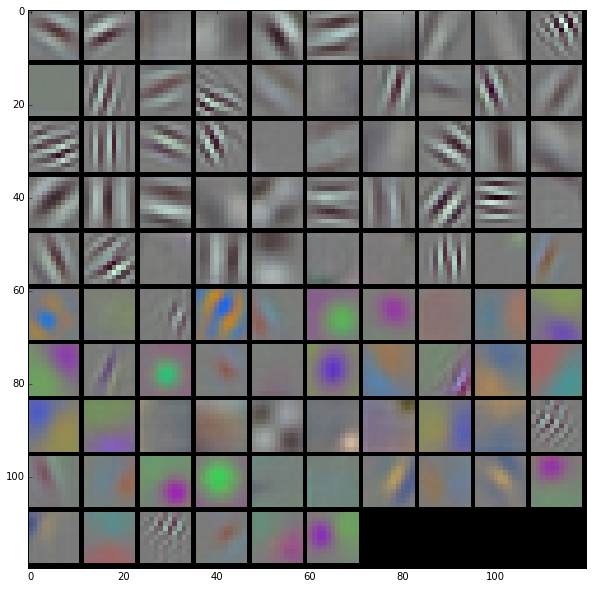

In [17]:
# The first layer filters, conv1
filters = net_obj.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

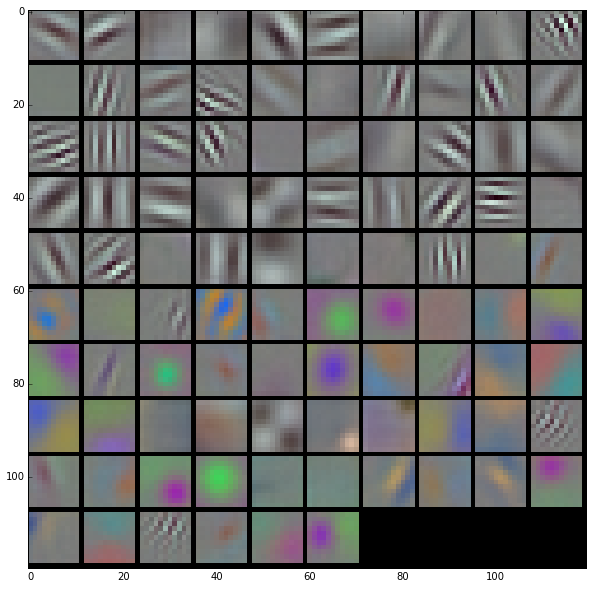

In [18]:
# The first layer filters, conv1
filters = net_style.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

In [5]:
# The first layer output, conv1 (rectified responses of the filters above, first 36 only)
feat = net.blobs['conv1'].data[0, :36]
vis_square(feat, padval=1)

NameError: name 'net' is not defined

In [6]:
# The second layer filters, conv2
# There are 256 filters, each of which has dimension 5 x 5 x 48. 
# We show only the first 48 filters, with each channel shown separately, so that each filter is a row.
filters = net.params['conv2'][0].data
vis_square(filters[:48].reshape(48**2, 5, 5))

NameError: name 'net' is not defined

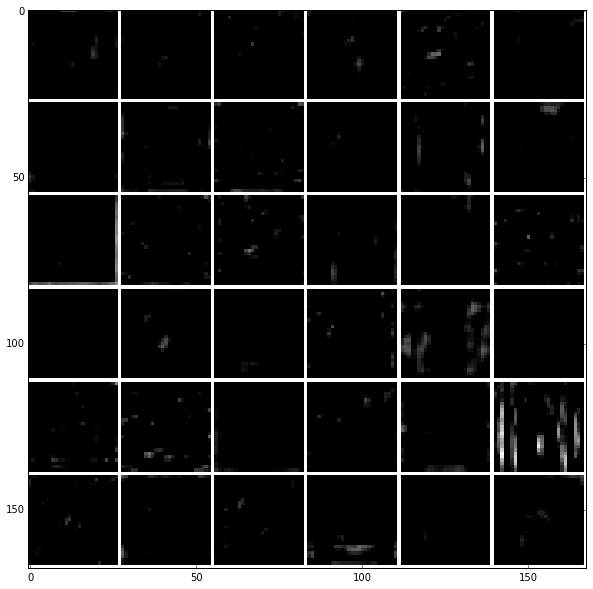

In [7]:
feat = net.blobs['conv2'].data[0, :36]
vis_square(feat, padval=1)

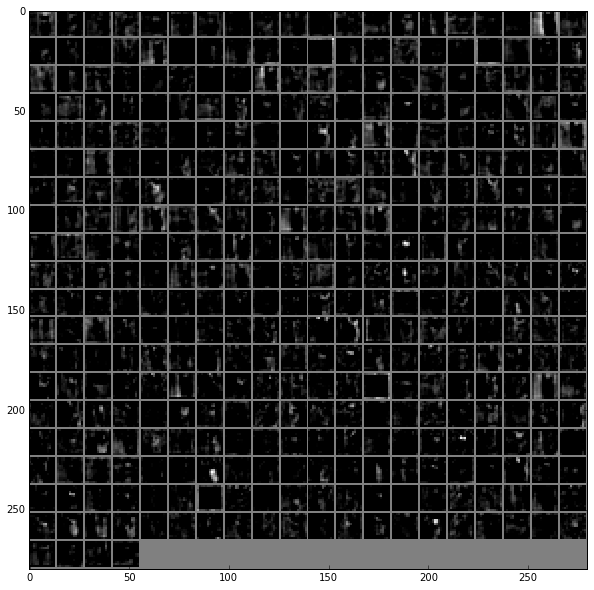

In [78]:
feat = net.blobs['conv3'].data[0]
vis_square(feat, padval=0.5)

Parting Words
-------------

So this is python! We hope the interface is easy enough for one to use. The python wrapper is interfaced with boost::python, and source code can be found at `python/caffe` with the main interface in `pycaffe.py` and the classification wrapper in `classifier.py`. If you have customizations to make, start there! Do let us know if you make improvements by sending a pull request!